In [1]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib ipympl
%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

# Test de l'implémentation de l'article d'Antunes et Debut

In [2]:
L = 0.65 #longueur de corde (m)
f1 = 110 #freq de la corde (hz)
T = 73.9 #tension de la corde (N)
rho_l = 3.61 * 10**(-3) #masse linéique (kg/m)
ct = np.sqrt(T/rho_l) #célérité des ondes transverse (M/s)
B = 4*10**(-5) #coefficient d'inarmonicité : B = E*I (N*m**2)

In [3]:
#Discrétisation
Nm = 100 #Modes
Nn = np.arange(1,Nm+1)

Nx = 1000
x = np.linspace(0,L,Nx)

phi_Nx_Nm = np.sin((2*Nn[np.newaxis,:]-1)*np.pi*x[:,np.newaxis]/2/L)

pn = (2 * Nn - 1) * np.pi / (2 * L)
fn = (ct / 2 / np.pi) * pn * (1 + pn**2 * B / (2 * T))
wn = 2*np.pi*fn

In [4]:
fn

array([   55.0295494 ,   165.0907356 ,   275.15818399,   385.23606936,
         495.32856652,   605.43985025,   715.57409535,   825.73547662,
         935.92816885,  1046.15634683,  1156.42418535,  1266.73585922,
        1377.09554323,  1487.50741217,  1597.97564083,  1708.50440402,
        1819.09787652,  1929.76023313,  2040.49564864,  2151.30829785,
        2262.20235556,  2373.18199655,  2484.25139563,  2595.41472758,
        2706.67616721,  2818.0398893 ,  2929.51006865,  3041.09088006,
        3152.78649831,  3264.60109821,  3376.53885455,  3488.60394213,
        3600.80053572,  3713.13281015,  3825.60494019,  3938.22110063,
        4050.98546629,  4163.90221195,  4276.9755124 ,  4390.20954244,
        4503.60847686,  4617.17649046,  4730.91775804,  4844.83645438,
        4958.93675429,  5073.22283255,  5187.69886396,  5302.36902332,
        5417.23748542,  5532.30842505,  5647.58601701,  5763.0744361 ,
        5878.7778571 ,  5994.70045482,  6110.84640404,  6227.21987957,
      

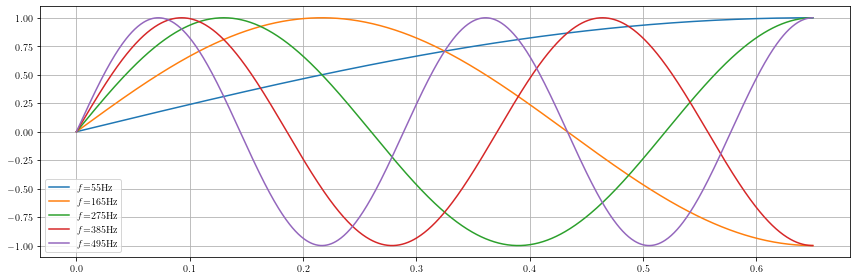

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(5) :
    ax1.plot(x,phi_Nx_Nm[:,i],label=f"$f$={fn[i]:.0f}Hz")
ax1.grid()
ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

In [6]:
etaf, etaA, etaB = 7e-5, 0.9, 2.5e-2

xin = 1/2 * ( T*(etaf + etaA/2/np.pi/fn) + etaB*B*pn**2 ) /(T + B*pn**2)

Mm = rho_l * L / 2  #masse modale corde

MS = np.diag(np.array([Mm]*Nm))
CS = MS * np.diag(2*wn*xin)
KS = MS*np.diag(wn**2)

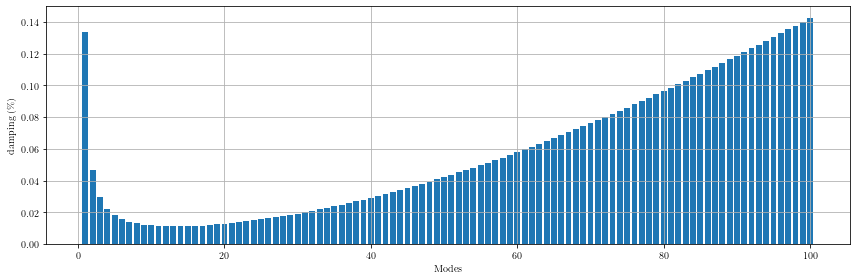

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.bar(Nn,xin*100,label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("Modes")
ax1.set_ylabel("damping (\%)")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

In [8]:
xinB = np.array([2.2,1.1,1.6,1.0,0.7,0.9,1.1,0.7,1.4,0.9,0.7,0.7,0.6,1.4,1.0,1.3])/100
fnB = np.array([78.3,100.2,187.3, 207.8, 250.9,291.8,314.7,344.5,399.0,429.6,482.9,504.2,553.9,580.3,645.7,723.5])
mnB = np.array([2.91,0.45,0.09,0.25,2.65,9.88,8.75,8.80,0.90,0.41,0.38,1.07,2.33,1.36,2.02,0.45])
NmB = len(fnB)
NnB = np.arange(1,NmB+1)

wnB = 2*np.pi*fnB

MB = np.diag(mnB)
CB = np.diag(2*mnB*wnB*xinB)
KB = np.diag(mnB*wnB**2)

In [9]:
#Matrices concaténées par bloc

M = np.block([
              [MS               , np.zeros((Nm,NmB))],
              [np.zeros((NmB,Nm)), MB               ]
])

K = np.block([
              [KS               , np.zeros((Nm,NmB))],
              [np.zeros((NmB,Nm)), KB               ]
])

C = np.block([
              [CS               , np.zeros((Nm,NmB))],
              [np.zeros((NmB,Nm)), CB               ]
])

In [10]:
show_matrixes = False
if show_matrixes :    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    img = ax1.imshow(MB,
        aspect="auto")
    ax1.set_title("MB")

    fig.colorbar(img,ax=ax1)

    img2 = ax2.imshow(MS,
        aspect="auto")
    ax2.set_title("MS")

    fig.colorbar(img2,ax=ax2)

    fig.tight_layout()

    plt.show()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    img = ax1.imshow(M)
    ax1.set_title("Mtot")

    fig.colorbar(img,ax=ax1)

    fig.tight_layout()

    plt.show()

In [11]:
#On dit dans un premier temps que la corde est attachée à gauche et à droite (on appuie pas dessus)

phiSB = phi_Nx_Nm[-1,:] #dernier indice en x => x=L
phiSF = phi_Nx_Nm[250,:] #premier indice en x : x=0

Aa1 = np.block([
                [phiSB.T, np.zeros(NmB)],
                [phiSF.T, np.zeros(NmB)]
])

Aa2 = np.block([
                [phiSB.T, -np.ones(NmB)],
                [phiSF.T, np.zeros(NmB)]
])

B = Aa1 @ np.linalg.inv(M**(1/2))

Bplus = B.T @ np.linalg.inv((B @ B.T))

W = np.eye(Nm+NmB) - np.linalg.inv(M**(1/2)) @ Bplus @ Aa1

In [12]:
#Fext dépend du temps

Fe = 4000
tfin = 10 #s
t = np.linspace(0,tfin,tfin*Fe)
Nt = len(t)

# deltat = 1e-5 #pas de discrétisation : s
# Fe = int(1/deltat)
# tfin = 10 #temps final d'intégration
# t = np.linspace(0,tfin,tfin*Fe)
# Nt = len(t)

## déf de la force : 
Fext = np.zeros_like(t)
idx_deb = 0
idx_fin = 1*Fe
Fext[idx_deb:idx_fin] = np.linspace(0,1,idx_fin - idx_deb) * 5

import mymodule as mm

xe_idx = mm.find_nearest_index(x, 0.9*L)

FextS_Nx_Nt = np.zeros((Nx,Nt))

FextS_Nx_Nt[xe_idx, : ] = Fext

#Projection de la force dans la base modale de la corde

Fmod_Nm_Nt = phi_Nx_Nm.T @ FextS_Nx_Nt

In [13]:
import control

MSinv = np.linalg.inv(MS)
MBinv = np.linalg.inv(MB)

ABG = W @ np.block([
    [-MSinv @ KS, np.zeros((Nm,NmB))],
    [np.zeros((NmB, Nm)), -MBinv @ KB]
])
ABD = W @ np.block([
    [-MSinv @ CS, np.zeros((Nm,NmB))],
    [np.zeros((NmB, Nm)), -MBinv @ CB]
])

A = np.block([
    [np.zeros((Nm+NmB,Nm+NmB)) , np.eye(Nm+NmB)],
    [ ABG         , ABD      ]
])

B = np.block([
    [np.zeros((Nm+NmB, Nx))],
    [W @ np.block([
        [MSinv @ phi_Nx_Nm.T],
        [np.zeros((NmB, Nx))]
        ])]
])

C = np.block([
    [np.eye(Nm+NmB) ,  np.zeros((Nm+NmB,Nm+NmB))]
])
#C permet d'observer la position avec les Nm premieres contributions des modes de la corde et ensuite les NmB de la plaque

D = 0

sys = control.StateSpace(A,B,C,D)

U = FextS_Nx_Nt
U = np.zeros((Nx,Nt))
U[500,0]=1

t, Q = control.forced_response(sys, T=t, U=U, X0=0)
# t, Q = control.impulse_response(sys, T=t, X0=0)

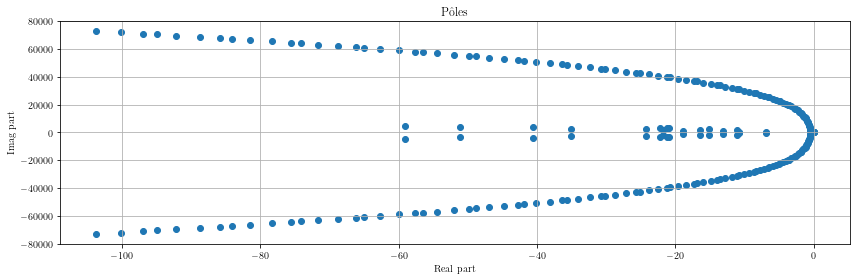

In [14]:
w, _ = np.linalg.eig(A)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(np.real(w),np.imag(w),label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("Real part")
ax1.set_ylabel("Imag part")
ax1.set_title(r"Pôles")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

In [15]:
#Pour repasser sur les coordonnées de la corde
xcorde_Nx_Nt = phi_Nx_Nm @ Q[:Nm,:]

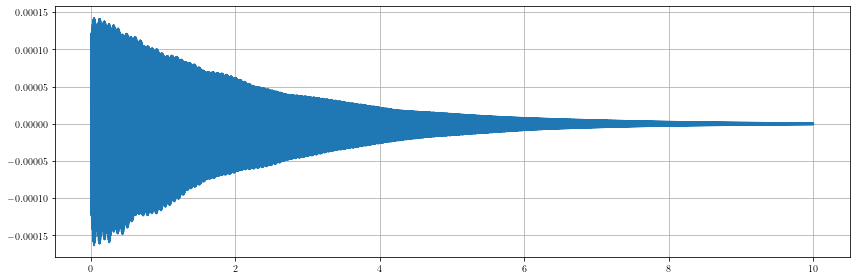

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(t,xcorde_Nx_Nt[500,:],label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

In [17]:
from IPython.display import display, Audio

display(Audio(xcorde_Nx_Nt[500,:], rate=Fe))